# Proyecto Final - MOVIE GENRE CLASSIFICATION
** Silverio Carmona Lozano    | 199618115**

** Jessica Barón Martinez     | 200924758**

** Carlos Jorge Quispe Castilla   | 201627368**

### In this first part we run some basics and common tasks required for our model ##

- Load the packages
- Load data from kaggle files
- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors

In [525]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

In [2]:
from keras import layers
from keras import models
import os, shutil

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
path = './'

In [264]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [265]:
dataTraining.head()

,year,title,plot,genres,rating
0,1995,Major Payne,major benson winifred payne is being discharge...,"['Adventure', 'Comedy', 'Family']",6.1
2,2008,Outlander,"in N ad , in the iron age , a spacecraft c...","['Action', 'Adventure', 'Sci-Fi']",6.3
3,2011,Mission: Impossible - Ghost Protocol,"imf agent ethan hunt , who ' s been out for s...","['Action', 'Adventure', 'Thriller']",7.4
8,2001,Mockingbird Don't Sing,"on november N , N on the cbs evening news...","['Biography', 'Drama']",6.5
10,2011,Snow Flower and the Secret Fan,"in N th - century china , seven year old gir...","['Drama', 'History']",6.1


In [266]:
dataTraining.columns

Index(['year', 'title', 'plot', 'genres', 'rating'], dtype='object')

In [267]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [268]:
dataTesting.columns

Index(['year', 'title', 'plot'], dtype='object')

## Read Images

In [269]:
image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[85]) + '_resize_gray.jpeg'))
#image = io.imread(os.path.join(path, 'images', str(dataTraining.index[85]) + '.jpeg'))

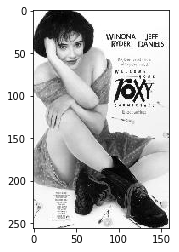

In [270]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

## Read pictures files into numpy arrays

In [11]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [12]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')))
#for i in tqdm(dataTraining.index):
 #   images_training.append(io.imread(os.path.join(path, 'images', str(i) + '.jpeg')).flatten())

100%|██████████| 7895/7895 [01:55<00:00, 68.37it/s]


In [13]:
images_training

[array([[221, 221, 221, ..., 231, 231, 231],
        [218, 218, 218, ..., 227, 227, 228],
        [221, 222, 222, ..., 232, 232, 232],
        ...,
        [ 49,  47,  60, ...,  56,  69,  75],
        [ 74,  35,  44, ...,  37,  23,  64],
        [ 70,  43,  49, ...,  28,  53,  34]], dtype=uint8),
 array([[21, 19, 15, ..., 20, 20, 20],
        [19, 17, 14, ..., 16, 16, 16],
        [18, 16, 15, ..., 15, 15, 15],
        ...,
        [24, 24, 24, ..., 24, 23, 22],
        [28, 28, 27, ..., 26, 26, 28],
        [31, 30, 28, ..., 31, 32, 35]], dtype=uint8),
 array([[209, 203, 196, ..., 225, 221, 218],
        [209, 204, 200, ..., 224, 222, 220],
        [206, 204, 202, ..., 222, 222, 221],
        ...,
        [  3,   3,   4, ...,   1,   1,   1],
        [  2,   2,   4, ...,   1,   1,   1],
        [  1,   2,   3, ...,   1,   1,   1]], dtype=uint8),
 array([[ 50,  62,  44, ...,  73,  64,  76],
        [ 47,  55,  48, ...,  69,  68, 101],
        [ 44,  45,  53, ...,  63,  68, 128],
       

In [14]:
images_training = np.stack(images_training)
images_training.shape, dataTraining.shape[0]

((7895, 256, 160), 7895)

In [15]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')))
#for i in tqdm(dataTesting.index):
#    images_testing.append(io.imread(os.path.join(path, 'images', str(i) + '.jpeg')).flatten())

100%|██████████| 3383/3383 [01:11<00:00, 47.50it/s]


In [16]:
images_testing = np.stack(images_testing)
images_testing.shape, dataTesting.shape[0]

((3383, 256, 160), 3383)

In [17]:
#Genera archivo fisico con informacioon de np.array
#pd.DataFrame(images_testing).to_csv('image_testing_array.csv', index_label='ID')

# Create y

In [271]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [272]:
dataTraining['genres']

0                             [Adventure, Comedy, Family]
2                             [Action, Adventure, Sci-Fi]
3                           [Action, Adventure, Thriller]
8                                      [Biography, Drama]
10                                       [Drama, History]
12                                                [Drama]
14                       [Action, Crime, Drama, Thriller]
15                   [Adventure, Drama, Romance, Western]
17                               [Crime, Drama, Thriller]
18                                       [Comedy, Family]
19                             [Drama, Mystery, Thriller]
20                      [Action, Drama, Sci-Fi, Thriller]
23                                          [Documentary]
26                                             [Thriller]
27                    [Adventure, Comedy, Crime, Romance]
28                               [Comedy, Romance, Drama]
29                                                [Drama]
30            

In [213]:
y_genres

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

## Separate data in training and test sets

In [215]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training, y_genres, test_size=0.33, random_state=42)

## Following parts we develop differents approachs to classify our project:
- Convolutional neural network
- Transfer learning
- Fine tuning

## Convolutional neural network CNN

In [391]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D, BatchNormalization

In [742]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu',
                 input_shape=(256, 160)))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Dropout(0.25))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.25))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu',
                 input_shape=(256, 160)))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Dropout(0.25))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='sigmoid'))

In [743]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_81 (Conv1D)           (None, 254, 32)           15392     
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 252, 32)           3104      
_________________________________________________________________
dropout_90 (Dropout)         (None, 252, 32)           0         
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 250, 64)           6208      
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 248, 64)           12352     
_________________________________________________________________
dropout_91 (Dropout)         (None, 248, 64)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 246, 64)           12352     
__________

In [744]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### During compilation phase we tried differents optimizers such as SGD, Adam, Adamax, RMSprop. At the end the best performance was achieved with RMSprop.

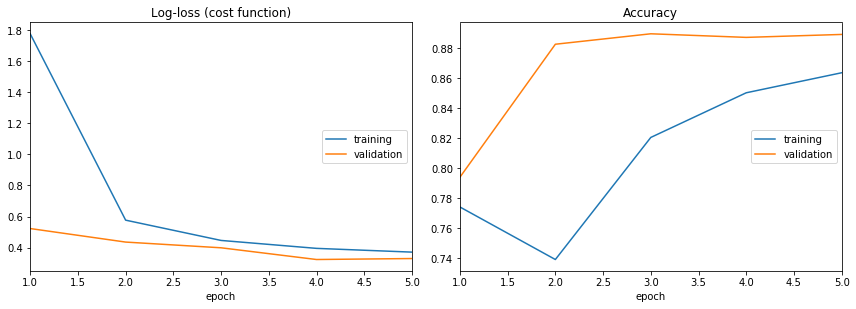

In [745]:
from livelossplot import PlotLossesKeras
n = 64
history = model.fit(X_train, y_train_genres, batch_size=n, epochs=5,verbose=1, validation_split=0.2, callbacks=[PlotLossesKeras()])

#### Previous output show an accurcy of about _84%_, however running the ROC metric we see a more realistic accuracy of _52%_ for this first 

In [746]:
history_dict = history.history
print("Valor de la pérdida", history_dict['loss'][4])
print("valor de la precisión", history_dict['acc'][4])

Valor de la pérdida 0.3712443762342858
valor de la precisión 0.8638127311497145


In [747]:
y_pred_genres_mod1 = model.predict(X_test)

In [748]:
roc_auc_score(y_test_genres, y_pred_genres_mod1, average='macro')

0.5272005228511941

In [719]:
pred = model.predict(images_testing)
pred

array([[0.8194812 , 0.73216915, 0.41060987, ..., 0.845524  , 0.6424282 ,
        0.3534623 ],
       [0.792563  , 0.70550305, 0.31257856, ..., 0.73299634, 0.5138984 ,
        0.5109346 ],
       [0.89037657, 0.9077821 , 0.43353656, ..., 0.8867531 , 0.5952314 ,
        0.3938174 ],
       ...,
       [0.99962056, 0.99385357, 0.07230125, ..., 0.99959344, 0.71425134,
        0.4257268 ],
       [0.9410904 , 0.781627  , 0.33937177, ..., 0.96617335, 0.75817823,
        0.20500477],
       [0.97934854, 0.8446158 , 0.22658351, ..., 0.9461077 , 0.45750526,
        0.45195964]], dtype=float32)

In [225]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
pd.DataFrame(pred, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_NN.csv', index_label='ID')

In [226]:
model.save('movie_genre.h1')

## Next we try Transfer Learning approach using feature extraction using a pretrained model VGG16

#### First,  due to VGG16 has 3 channels we need to do some transforation in order to adapt it to grey scale

In [400]:
from keras.applications import VGG16
from skimage.transform import resize

In [749]:
vgg16 = VGG16(include_top=False, weights='imagenet')

def apply_vgg_grayscale(images):
    images_ = []
    for img in tqdm(images):
        # reshape
        img = img.reshape((256, 160))
        # rescale
        img = resize(img, (224, 224), mode='reflect')
        # repeat
        img = [img] * 3
        images_.append(img)

    # To numpy array
    images_ = np.array(images_)
    # move channel to last axis
    images_ = np.rollaxis(images_, 1, 4)
    # Apply vgg
    images_vgg = vgg16.predict(images_)
    return images_vgg

In [37]:
images_training_vgg = apply_vgg_grayscale(images_training)
images_training_vgg.shape

100%|██████████| 7895/7895 [00:25<00:00, 308.43it/s]


(7895, 7, 7, 512)

In [38]:
images_testing_vgg = apply_vgg_grayscale(images_testing)
images_testing_vgg

100%|██████████| 3383/3383 [00:37<00:00, 90.12it/s]


array([[[[2.53222615e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 5.01114130e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.19823933e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 7.49393821e-01, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.43093288e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.31566167e-01, 0.00000000e+00],
         [1.70725346e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 7.95173645e-01, 0.00000000e+00]],

        [[5.69700360e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.83407128e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 8.08400989e-01, 0.00000000e+00],
        

In [363]:
images_training_vgg.shape

(7895, 7, 7, 512)

In [721]:
X_train_vgg, X_test_vgg, y_train_genres_vgg, y_test_genres_vgg = train_test_split(images_training_vgg, y_genres, test_size=0.33, random_state=42)

In [722]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [750]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Concatenate
from keras import backend as K
from keras import models
from keras import layers

model2 = Sequential()
#model.add(vgg16)
model2.add(Flatten(input_shape = (7,7,512)))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(24))
model2.add(Activation('sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_70 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_201 (Dense)            (None, 256)               6422784   
_________________________________________________________________
activation_97 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_202 (Dense)            (None, 24)                6168      
_________________________________________________________________
activation_98 (Activation)   (None, 24)                0         
Total params: 6,428,952
Trainable params: 6,428,952
Non-trainable params: 0
_________________________________________________________________


In [751]:
vgg16.trainable = False

#### We tested differents optimizers such as SGD, Adam, Adamax, RMSprop. At the end the best performance was achieved with RMSprop with a low rate. The reason for using a low learning rate is that we want to limit the magnitude of the modifications making to the representations of the layers we’re fine-tuning. Updates that are too large may harm these representations.

In [752]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              #optimizer=keras.optimizers.Adam(),
              metrics=['acc'])

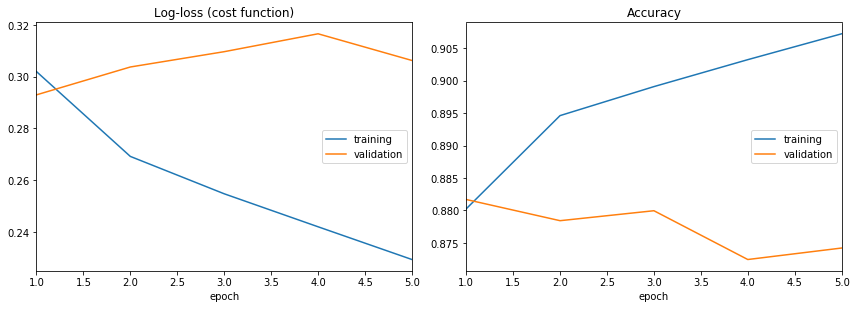

In [753]:
n = 64
history = model2.fit(X_train_vgg, y_train_genres_vgg, batch_size=n, epochs=5,verbose=1, validation_split=0.2, callbacks=[PlotLossesKeras()])

#### Previous output show an accurcy of about _90%_, and in this case our ROC metric improves respecto to CNN model achieving and accuracy of _70%_ which represent and improvement of almost 40%.

In [754]:
history_dict = history.history
print("Valor de la pérdida", history_dict['loss'][4])
print("valor de la precisión", history_dict['acc'][4])

Valor de la pérdida 0.2293441455975911
valor de la precisión 0.9072421773954701


In [755]:
y_pred_genres_vgg = model2.predict(X_test_vgg)

In [756]:
roc_auc_score(y_test_genres, y_pred_genres_vgg, average='macro')

0.70431410594817

In [734]:
pred_vgg = model2.predict(images_testing_vgg)
pred_vgg

array([[0.0260863 , 0.37197563, 0.05888726, ..., 0.04549521, 0.28373957,
        0.02195189],
       [0.05126761, 0.17446983, 0.01645914, ..., 0.5595986 , 0.09890963,
        0.01862592],
       [0.126237  , 0.41037145, 0.01378079, ..., 0.5945863 , 0.05295979,
        0.02071308],
       ...,
       [0.04916771, 0.2289033 , 0.00093312, ..., 0.22457194, 0.05408775,
        0.07341823],
       [0.08410954, 0.8710898 , 0.42359293, ..., 0.02801615, 0.14906912,
        0.03115012],
       [0.08792063, 0.32142222, 0.00899171, ..., 0.14361611, 0.12545982,
        0.02435391]], dtype=float32)

In [240]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
pd.DataFrame(pred_vgg, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_NN_VGG.csv', index_label='ID')

In [241]:
model2.save('movie_genre.h2')

## Now we try Fine Tunning approach usingthe same pretrained model VGG16

In [757]:
vgg16.trainable = True
set_trainable = True
for layer in vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [758]:
model3 = Sequential()
#model.add(vgg16)
model3.add(Flatten(input_shape=(7,7,512)))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(24))
model3.add(Activation('sigmoid'))

In [759]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

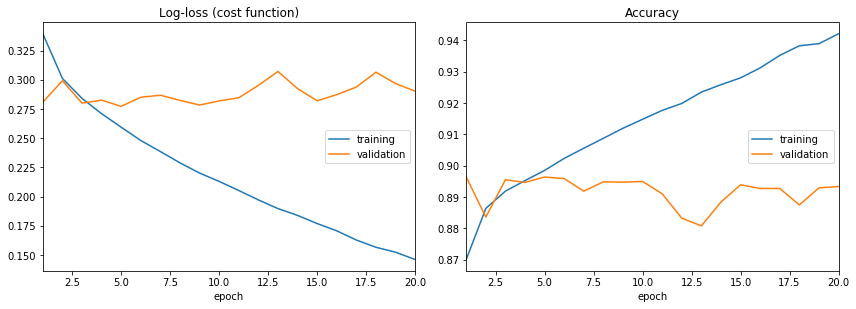

In [760]:
n = 64
history = model3.fit(X_train_vgg, y_train_genres_vgg, batch_size=n, epochs=20,verbose=1, validation_split=0.2, callbacks=[PlotLossesKeras()])

#### Using this approach we got an accuracy of _93%_, slightly better than transfer learning, but using ROC metric the improvement show a big jump to _81%_ which represents and improvement of almost 12%.

In [761]:
history_dict = history.history
print("Valor de la pérdida", history_dict['loss'][4])
print("valor de la precisión", history_dict['acc'][4])

Valor de la pérdida 0.25936484603108706
valor de la precisión 0.8984479628057802


In [762]:
y_pred_genres_vgg_ft = model3.predict(X_test_vgg)

In [763]:
roc_auc_score(y_test_genres, y_pred_genres_vgg_ft, average='micro')

0.8183651438267068

In [418]:
pred_vgg_ft = model3.predict(images_testing_vgg)
pred_vgg_ft

array([[0.22952098, 0.04260686, 0.01131791, ..., 0.06978163, 0.05859339,
        0.06574193],
       [0.16405573, 0.01767133, 0.00962627, ..., 0.3511957 , 0.03995462,
        0.01721982],
       [0.5466642 , 0.04513432, 0.00599606, ..., 0.45847276, 0.02189437,
        0.01864226],
       ...,
       [0.42055413, 0.01601343, 0.0007567 , ..., 0.22852159, 0.01493912,
        0.07523021],
       [0.38111183, 0.43867838, 0.13170484, ..., 0.06026993, 0.04987239,
        0.02328721],
       [0.3286647 , 0.02254647, 0.0060015 , ..., 0.17586888, 0.03972857,
        0.02889866]], dtype=float32)

In [337]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
pd.DataFrame(pred_vgg_ft, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_NN_VGG_FT.csv', index_label='ID')

In [419]:
model3.save('movie_genre_img_ft.h3')

## In this final part we are going to run the best solution using text and concatenate it with the best images solution in order to get a better prediction solution

### This part brings the best performance text solution which produce an accuracy of _84%_

In [764]:
from sklearn.feature_extraction.text import CountVectorizer
XN=dataTraining['plot']
vect = CountVectorizer(ngram_range=(1, 5), max_features=2000)
X_dtmCNN = vect.fit_transform(XN)
X_dtmCNN.shape

(7895, 2000)

In [671]:
X_trainCNN, X_testCNN, y_trainCNN, y_testCNN = train_test_split(X_dtmCNN, y_genres, test_size=0.33, random_state=42)

In [672]:
X_trainCNN.shape, X_testCNN.shape, y_trainCNN.shape, y_testCNN.shape

((5289, 2000), (2606, 2000), (5289, 24), (2606, 24))

In [706]:
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Embedding

modelCNN = Sequential()
modelCNN.add(Dense(512, input_shape=X_dtmCNN.shape[1:], activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(Dropout(0.8))
modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dense(128, activation='relu'))
modelCNN.add(Dense(64, activation='relu'))
modelCNN.add(Dense(24, activation='sigmoid'))
modelCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 512)               1024512   
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_188 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_189 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_190 (Dense)            (None, 24)                1560      
Total para

In [707]:
#Compilación
modelCNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

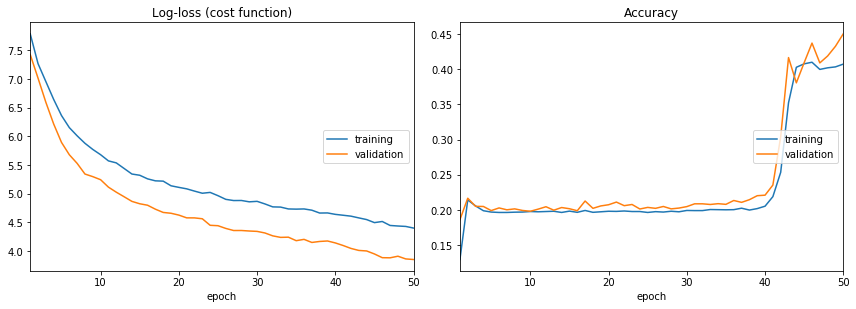

In [708]:
modelCNN.fit(X_trainCNN, y_trainCNN, validation_data=[X_trainCNN, y_trainCNN], 
          batch_size=128, epochs=50, verbose=2,
          callbacks=[PlotLossesKeras()])

#### The performance of this model was of _84%_ 

In [709]:
y_predCNN = modelCNN.predict_proba(X_testCNN)

In [710]:
roc_auc_CNN=roc_auc_score(y_testCNN, y_predCNN, average='macro')

In [705]:
roc_auc_CNN

0.8049050078163105

In [699]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = modelCNN.predict_proba(X_test_dtm)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_CNN.csv', index_label='ID')

## Now using we build a new model, using the previous saved models:images and text 

In [471]:
from keras.models import load_model, Model

In [472]:
model_img = load_model('movie_genre_img_ft.h3')
model_txt = load_model('movie_genre_txt.h3')

In [473]:
mergedModel = Concatenate()([model_img.output, model_txt.output])
out = Dense(128, activation='relu')(mergedModel)
out = Dropout(0.8)(out)
out = Dense(24, activation='sigmoid')(out)

In [474]:
new_model = Model(
    [model_img.input, model_txt.input], 
    out                         
)

In [475]:
new_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_48_input (InputLayer)   (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
dense_8_input (InputLayer)      (None, 2000)         0                                            
__________________________________________________________________________________________________
flatten_48 (Flatten)            (None, 25088)        0           flatten_48_input[0][0]           
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 512)          1024512     dense_8_input[0][0]              
__________________________________________________________________________________________________
dense_97 (

In [476]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [477]:
X_train.shape, X_trainCNN.shape, y_train_genres.shape

((5289, 256, 160), (5289, 2000), (5289, 24))

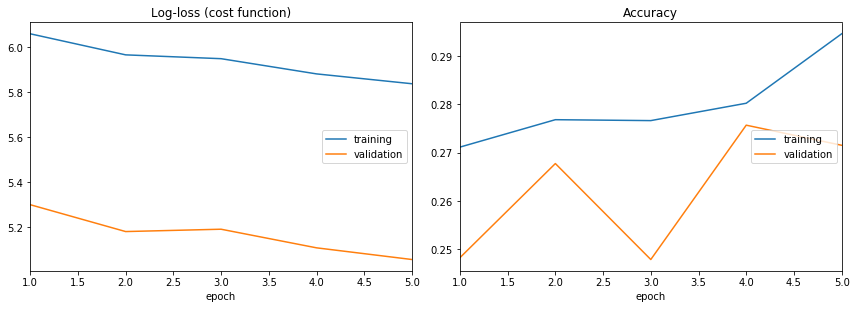

In [520]:
new_model.fit([X_train_vgg, X_trainCNN], y_train_genres, batch_size=64, epochs=5, 
                     shuffle=True, verbose=1, validation_data=([X_train_vgg, X_trainCNN], y_train_genres),callbacks=[PlotLossesKeras()])

#### The concatenation seems to produce a better model, the ROC is _90%_ it improves 6% respect the beeter model using text

In [521]:
#ROC
y_pred_nm = new_model.predict([ X_test_vgg, X_testCNN])

In [523]:
#pd.DataFrame(y_pred_nm).to_csv('pred_merged_nm.csv')

In [524]:
roc_auc_score(y_test_genres, y_pred_nm, average='macro')

0.9065875649311756